**Author : Gaurav Somvanshi**

**Data Science And Business Analytics At GRIP MAY21**

**Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.**

**Importing Required libraries and Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [3]:
uploaded = files.upload()

Saving IRIS.csv to IRIS.csv


In [ ]:
for fn in uploaded.keys():
  print("User uploaded file'{name}' with length {length} bytes".format(name = fn, length=len(uploaded[fn])))

User uploaded file'IRIS.csv' with length 4617 bytes


In [ ]:
uploaded

{'IRIS.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\r\n5.1,3.5,1.4,0.2,Iris-setosa\r\n4.9,3,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.3,0.2,Iris-setosa\r\n4.6,3.1,1.5,0.2,Iris-setosa\r\n5,3.6,1.4,0.2,Iris-setosa\r\n5.4,3.9,1.7,0.4,Iris-setosa\r\n4.6,3.4,1.4,0.3,Iris-setosa\r\n5,3.4,1.5,0.2,Iris-setosa\r\n4.4,2.9,1.4,0.2,Iris-setosa\r\n4.9,3.1,1.5,0.1,Iris-setosa\r\n5.4,3.7,1.5,0.2,Iris-setosa\r\n4.8,3.4,1.6,0.2,Iris-setosa\r\n4.8,3,1.4,0.1,Iris-setosa\r\n4.3,3,1.1,0.1,Iris-setosa\r\n5.8,4,1.2,0.2,Iris-setosa\r\n5.7,4.4,1.5,0.4,Iris-setosa\r\n5.4,3.9,1.3,0.4,Iris-setosa\r\n5.1,3.5,1.4,0.3,Iris-setosa\r\n5.7,3.8,1.7,0.3,Iris-setosa\r\n5.1,3.8,1.5,0.3,Iris-setosa\r\n5.4,3.4,1.7,0.2,Iris-setosa\r\n5.1,3.7,1.5,0.4,Iris-setosa\r\n4.6,3.6,1,0.2,Iris-setosa\r\n5.1,3.3,1.7,0.5,Iris-setosa\r\n4.8,3.4,1.9,0.2,Iris-setosa\r\n5,3,1.6,0.2,Iris-setosa\r\n5,3.4,1.6,0.4,Iris-setosa\r\n5.2,3.5,1.5,0.2,Iris-setosa\r\n5.2,3.4,1.4,0.2,Iris-setosa\r\n4.7,3.2,1.6,0.2,Iris-setosa\r\n4.8,3.1,1.6,0.

In [ ]:
import io

In [ ]:
df = pd.read_csv(io.StringIO(uploaded["IRIS.csv"].decode("utf-8")))
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Performing EDA On IRIS Data**

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

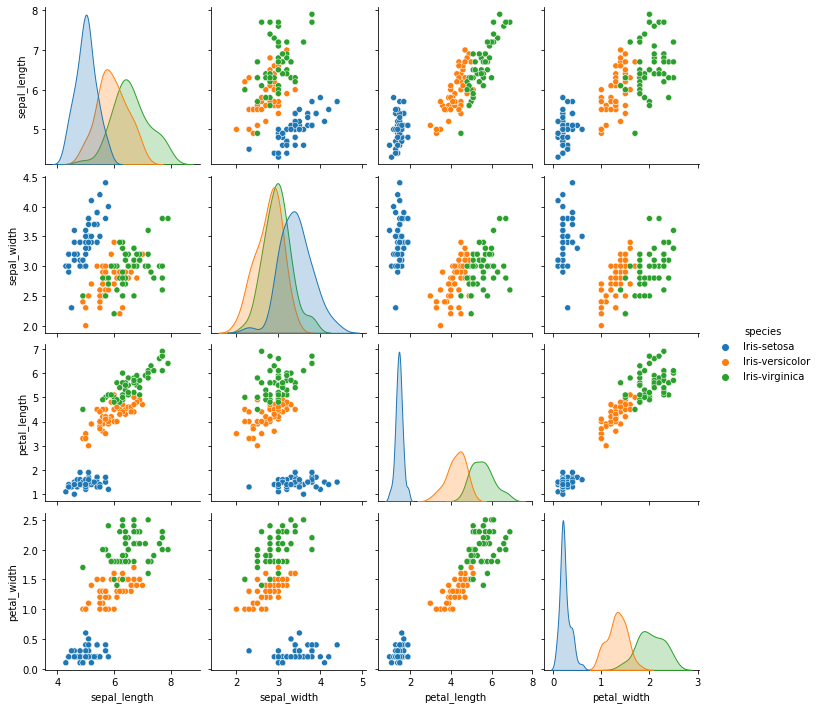

In [ ]:
sns.pairplot(df.iloc[:, 0:], hue = "species")

PairPlot insights-

1)petal-length and petal-width seem to be positively correlated(seem to be having a linear relationship)

2)Iris-Setosa seems to have smaller petal length and petal width as compared to others.

3)It is clearly visible that Iris setosa forms a separate cluster, whereas the other two species, Iris-versicolor and Iris-virginica are inseparable clusters. 

**Dropping The "species" Column**

In [ ]:
df.drop(["species"], axis = 1, inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = df.iloc[:, [0, 1, 2, 3]].values

In [ ]:
from sklearn.cluster import KMeans

**Finding the optimal number of clusters for K-Means and determining the value of K**

In [ ]:
sum_sq_cluster = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
  kmeans.fit(X)
  sum_sq_cluster.append(kmeans.inertia_)


**Plotting The Graph On A Line Graph To Observe The Pattern**

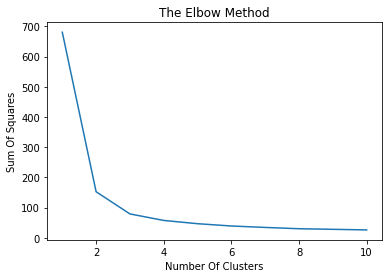

In [ ]:
plt.plot(range(1, 11), sum_sq_cluster)
plt.title("The Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("Sum Of Squares")
plt.show()

Using the above method the optimum number of clusters calculated is 3

**Creating K-Means Classifier**

In [ ]:
Kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state = 0)
Y_Kmeans = Kmeans.fit_predict(X)

**Visualization Of The Clusters**

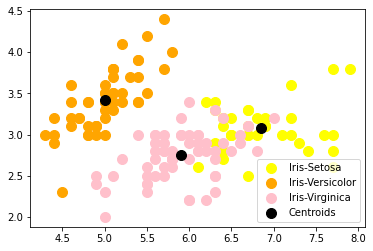

In [ ]:
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0, 1],
            s = 100, c = "Yellow", label = "Iris-Setosa")
plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1, 1],
            s = 100, c = "Orange", label = "Iris-Versicolor")
plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2, 1],
            s = 100, c = "Pink", label = "Iris-Virginica")
# Plotting the centroid of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s = 100, c = "Black", label = "Centroids")
plt.legend()



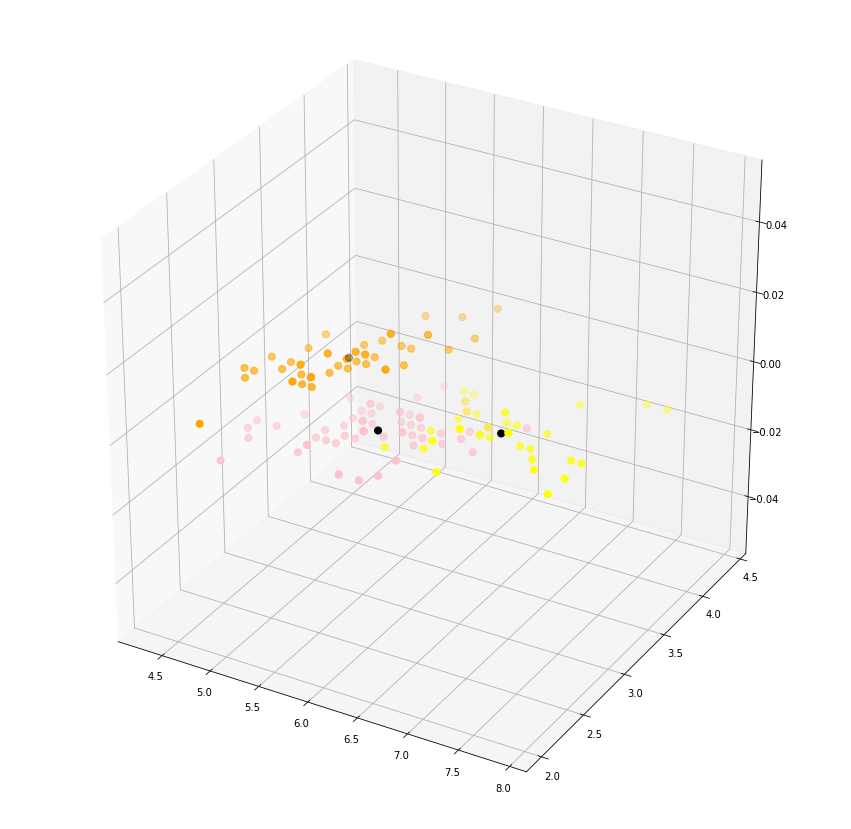

In [ ]:
# 3d scatterplot using matplotlib
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection = "3d")
plt.scatter(X[Y_Kmeans == 0, 0], X[Y_Kmeans == 0, 1], s = 50, c = "Yellow", label = "Iris-Setosa")
plt.scatter(X[Y_Kmeans == 1, 0], X[Y_Kmeans == 1, 1], s = 50, c = "Orange", label = "Iris-Versicolour")
plt.scatter(X[Y_Kmeans == 2, 0], X[Y_Kmeans == 2, 1], s = 50, c = "Pink", label = "Iris-Virginica")
# Plotting the centroid of the clusters
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], 
            s = 50, c = "Black", label = "Centroids")
plt.show()
